In [1]:
import numpy as np
from numba import jit, njit, float64
from sympy import *

In [2]:
els = symbols('p f g h k l')
p, f, g, h, k, l = els
mu = symbols('mu')

w = 1 + f * cos(l) + g * sin(l)
c = 1 + h ** 2 + k ** 2
z = h * sin(l) - k * cos(l)

Ai = sqrt(mu / p) * w ** 2 / p
# A = sqrt(mu / p) * Matrix([
#     0, 0, 0, 0, 0, w ** 2 / p
# ])

B = sqrt(p / mu) * Matrix([
    [0, 2 * p / w, 0],
    [sin(l), cos(l) + (f + cos(l)) / w, -z * g / w],
    [-cos(l), sin(l) + (g + sin(l)) / w, z * f / w],
    [0, 0, c * cos(l) / (2 * w)],
    [0, 0, c * sin(l) / (2 * w)],
    [0, 0, z / w]
])

B

Matrix([
[                 0,                     2*p*sqrt(p/mu)/(f*cos(l) + g*sin(l) + 1),                                                                 0],
[ sqrt(p/mu)*sin(l), sqrt(p/mu)*((f + cos(l))/(f*cos(l) + g*sin(l) + 1) + cos(l)),     g*sqrt(p/mu)*(-h*sin(l) + k*cos(l))/(f*cos(l) + g*sin(l) + 1)],
[-sqrt(p/mu)*cos(l), sqrt(p/mu)*((g + sin(l))/(f*cos(l) + g*sin(l) + 1) + sin(l)),      f*sqrt(p/mu)*(h*sin(l) - k*cos(l))/(f*cos(l) + g*sin(l) + 1)],
[                 0,                                                            0, sqrt(p/mu)*(h**2 + k**2 + 1)*cos(l)/(2*f*cos(l) + 2*g*sin(l) + 2)],
[                 0,                                                            0, sqrt(p/mu)*(h**2 + k**2 + 1)*sin(l)/(2*f*cos(l) + 2*g*sin(l) + 2)],
[                 0,                                                            0,        sqrt(p/mu)*(h*sin(l) - k*cos(l))/(f*cos(l) + g*sin(l) + 1)]])

In [3]:
_els = np.array([
    9.99708536e-01, -3.76678695e-03,  
    1.62868327e-02, -7.70205129e-06,
    6.18315849e-07,  7.87870723e+00,
])
_mu = 1

In [8]:
dAi = Ai.diff(Matrix(els))
dAi

Matrix([
[              -3*sqrt(mu/p)*(f*cos(l) + g*sin(l) + 1)**2/(2*p**2)],
[                  2*sqrt(mu/p)*(f*cos(l) + g*sin(l) + 1)*cos(l)/p],
[                  2*sqrt(mu/p)*(f*cos(l) + g*sin(l) + 1)*sin(l)/p],
[                                                                0],
[                                                                0],
[sqrt(mu/p)*(-2*f*sin(l) + 2*g*cos(l))*(f*cos(l) + g*sin(l) + 1)/p]])

In [6]:
# dAi = MutableDenseMatrix(dAi)
# dAi[3] = 1e-99
# dAi[4] = 1e-99
# display(dAi)
# dAi_jit = njit(lambdify((els, mu), dAi))
# dAi_jit(_els, _mu)

# with open('dAi_jit.pkl', 'wb') as f:
#     pickle.dump(dAi_jit, f)

In [15]:
print_python(dAi)

mu = Symbol('mu')
p = Symbol('p')
f = Symbol('f')
l = Symbol('l')
g = Symbol('g')
e = ImmutableDenseMatrix([[-3*sqrt(mu/p)*(f*cos(l) + g*sin(l) + 1)**2/(2*p**2)], [2*sqrt(mu/p)*(f*cos(l) + g*sin(l) + 1)*cos(l)/p], [2*sqrt(mu/p)*(f*cos(l) + g*sin(l) + 1)*sin(l)/p], [0], [0], [sqrt(mu/p)*(-2*f*sin(l) + 2*g*cos(l))*(f*cos(l) + g*sin(l) + 1)/p]])


In [5]:
# njit(float64[:, :](float64[:], float64))(exp)(_els, _mu)

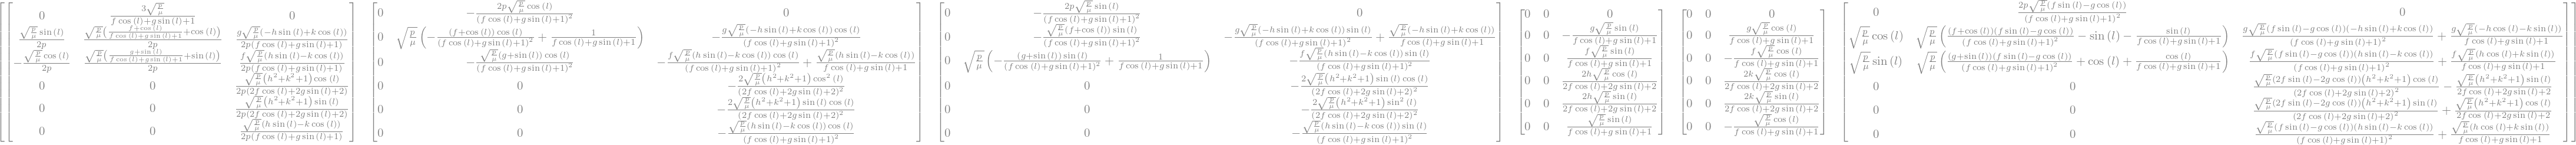

In [87]:
dB = B.diff(Matrix(els))[:, 0]
dB

In [88]:
dB.shape

In [117]:
A.diff(Matrix(els))

NameError: name 'A' is not defined

In [89]:
from sympy.printing.python import PythonPrinter

In [108]:
sub_exprs, simplified_rhs = cse(simplify(dB))

In [115]:
for var, expr in sub_exprs:
    print(var, '=', expr)

x0 = sqrt(p/mu)
x1 = cos(l)
x2 = f*x1
x3 = sin(l)
x4 = g*x3
x5 = x4 + 1
x6 = x2 + x5
x7 = 1/x6
x8 = x0*x7
x9 = x0*x3
x10 = 1/p
x11 = x10/2
x12 = 2*l
x13 = cos(x12)
x14 = x13/4
x15 = sin(x12)
x16 = x15/4
x17 = x10*x8
x18 = h*x3
x19 = -k*x1 + x18
x20 = x11*x8
x21 = x0*x1
x22 = f/2
x23 = x21*x7
x24 = h**2 + k**2 + 1
x25 = x10*x24/4
x26 = x7*x9
x27 = x6**2
x28 = 1/x27
x29 = 2*p
x30 = x28*x29
x31 = g + x3
x32 = x28*x31
x33 = k*x13
x34 = -h*x15 + k + x33
x35 = x0*x28
x36 = x35/2
x37 = -x24*x36
x38 = -x16*x24*x35
x39 = f + x1
x40 = x28*x39
x41 = k*x1
x42 = h*x13 - h + k*x15
x43 = f*x3
x44 = g*x1
x45 = k*x3
x46 = x43 - x44
x47 = x35*(f*h + g*k + h*x1 + x45)
x48 = x24*x36


In [125]:
print(simplified_rhs[0])

[[[0, 3*x8, 0], [x11*x9, x17*(f*x14 + 3*f/4 + g*x16 + x1), -g*x19*x20], [-x11*x21, x17*(f*x16 - g*x14 + 3*g/4 + x3), x17*x19*x22], [0, 0, x23*x25], [0, 0, x25*x26], [0, 0, x19*x20]], [[0, -x21*x30, 0], [0, x32*x9, -g*x34*x36], [0, -x21*x32, x19*x35*x5], [0, 0, x1**2*x37], [0, 0, x38], [0, 0, x34*x36]], [[0, -x30*x9, 0], [0, -x40*x9, x35*(-h*x15*x22 + k*x22 - x18 + x22*x33 + x41)], [0, x21*x40, x22*x35*x42], [0, 0, x38], [0, 0, x3**2*x37], [0, 0, x36*x42]], [[0, 0, 0], [0, 0, -x4*x8], [0, 0, x43*x8], [0, 0, h*x23], [0, 0, x18*x8], [0, 0, x26]], [[0, 0, 0], [0, 0, x44*x8], [0, 0, -x2*x8], [0, 0, x41*x8], [0, 0, x45*x8], [0, 0, -x23]], [[0, x29*x35*x46, 0], [x21, x35*(-x27*x3 - x3*x6 + x39*x46), -g*x47], [x9, x35*(x1*x27 + x1*x6 + x31*x46), f*x47], [0, 0, -x31*x48], [0, 0, x39*x48], [0, 0, x47]]]


In [39]:
dBi = B.diff(h)
dBi[0, :] = [[1e-99, 0.0, 0.0]]
display(dBi)
exp = lambdify((els, mu), dBi, 'numpy')
print(exp(_els, _mu))
print(njit(exp)(_els, _mu))

Matrix([
[1.0e-99, 0,                                                   0],
[      0, 0,      -g*sqrt(p/mu)*sin(l)/(f*cos(l) + g*sin(l) + 1)],
[      0, 0,       f*sqrt(p/mu)*sin(l)/(f*cos(l) + g*sin(l) + 1)],
[      0, 0, 2*h*sqrt(p/mu)*cos(l)/(2*f*cos(l) + 2*g*sin(l) + 2)],
[      0, 0, 2*h*sqrt(p/mu)*sin(l)/(2*f*cos(l) + 2*g*sin(l) + 2)],
[      0, 0,         sqrt(p/mu)*sin(l)/(f*cos(l) + g*sin(l) + 1)]])

[[ 1.00000000e-99  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.60172001e-02]
 [ 0.00000000e+00  0.00000000e+00 -3.70442685e-03]
 [ 0.00000000e+00  0.00000000e+00  1.87323239e-07]
 [ 0.00000000e+00  0.00000000e+00 -7.57454191e-06]
 [ 0.00000000e+00  0.00000000e+00  9.83444751e-01]]
[[ 1.00000000e-99  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.60172001e-02]
 [ 0.00000000e+00  0.00000000e+00 -3.70442685e-03]
 [ 0.00000000e+00  0.00000000e+00  1.87323239e-07]
 [ 0.00000000e+00  0.00000000e+00 -7.57454191e-06]
 [ 0.00000000e+00  0.00000000e+00  9.83444751e-01]]


In [6]:
exp2 = lambdify((els, mu), B.diff(h), 'numpy')
# print(njit(exp2)(_els, _mu))

In [50]:
dB_list = [diff(B, el) for el in els]

dB_list[3][0, 0] = [1e-99]
dB_list[4][0, 0] = [1e-99]

fn_B = njit(lambdify((els, mu), B, 'numpy'))
fn_dB = [
    njit(lambdify((els, mu), dBi, 'numpy'))
    for dBi in dB_list
]

In [59]:
%%timeit
fn_B(_els, _mu)

1.39 µs ± 5.17 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [60]:
%%timeit
for fn in fn_dB:
    fn(_els, _mu)

8.48 µs ± 37.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [56]:
np.array([fn_dBi(_els, _mu) for fn_dBi in fn_dB])

array([[[ 0.00000000e+00,  2.95123633e+00,  0.00000000e+00],
        [ 4.99920029e-01, -2.63808126e-02,  6.15781340e-08],
        [ 1.23633402e-02,  9.99799150e-01,  1.42416709e-08],
        [ 0.00000000e+00,  0.00000000e+00, -6.08207624e-03],
        [ 0.00000000e+00,  0.00000000e+00,  2.45932868e-01],
        [ 0.00000000e+00,  0.00000000e+00, -3.78085384e-06]],

       [[ 0.00000000e+00,  4.78447932e-02,  0.00000000e+00],
        [ 0.00000000e+00,  9.83063700e-01,  2.99487342e-09],
        [ 0.00000000e+00,  2.43117905e-02, -7.55881107e-06],
        [ 0.00000000e+00,  0.00000000e+00, -2.95803839e-04],
        [ 0.00000000e+00,  0.00000000e+00,  1.19610284e-02],
        [ 0.00000000e+00,  0.00000000e+00, -1.83883108e-07]],

       [[ 0.00000000e+00, -1.93463659e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.75668011e-02,  7.43840399e-06],
        [ 0.00000000e+00,  6.81744522e-04, -2.80077105e-08],
        [ 0.00000000e+00,  0.00000000e+00,  1.19610284e-02],
        [ 0.00000000